# CalTech 101

Maintenant que nous avons appris à faire du Transfer Learning, tentons de l'utiliser sur des Datasets plus grands. Nous allons pour cela étudier le dataset [CalTech101](http://www.vision.caltech.edu/Image_Datasets/Caltech101/)  qui recense 40 à 800 images de 101 catégories. 

* Importez les librairies classiques 
  * Tensorflow 2.0
  * Numpy 
  * Matplotlib

In [ ]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0)


In [ ]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
tf.__version__

'2.2.0'

* En utilisant [`tf.keras.utils.get_file()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file), téléchargez et extrayez le dataset Caltech101 de ce lien : http://www.vision.caltech.edu/Image_Datasets/Caltech101/

In [ ]:
data_root_orig = tf.keras.utils.get_file(origin='https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Deep+learning+Images+processing/Transfer+Learning/101_ObjectCategories.zip',
                                         fname='/content/101_ObjectCategories.zip',
                                         extract=True, 
                                         cache_subdir="/content")

* En utilisant [pathlib](https://docs.python.org/3/library/pathlib.html), créez un chemin vers le dossier `101_ObjectCategories`

In [ ]:
import pathlib
train_folder = pathlib.Path("/content/101_ObjectCategories")
train_folder

PosixPath('/content/101_ObjectCategories')

* Convertissez chacun des chemins des images en `string`

In [ ]:
# Convert all paths into a string
all_image_paths = [str(img_path) for img_path in list(train_folder.glob("*/*"))]
all_image_paths[:5]

['/content/101_ObjectCategories/ewer/image_0020.jpg',
 '/content/101_ObjectCategories/ewer/image_0011.jpg',
 '/content/101_ObjectCategories/ewer/image_0057.jpg',
 '/content/101_ObjectCategories/ewer/image_0001.jpg',
 '/content/101_ObjectCategories/ewer/image_0071.jpg']

* En utilisant[ tf.io.read_file](https://www.tensorflow.org/api_docs/python/tf/io/read_file), convertissez chacun des chemin en bytes

In [ ]:
# Convert all string path into bytes
all_image_bytes = [tf.io.read_file(path) for path in all_image_paths]

* Enfin convertissez les bytes en Tenseurs en utilisant [tf.io.decode_jpeg](https://www.tensorflow.org/api_docs/python/tf/io/decode_jpeg)

In [ ]:
# Convert all bytes into a tensor
all_image_tensors = [tf.image.decode_jpeg(img_byte) for img_byte in all_image_bytes]

* Créez un moyen de visualiser des images aléatoires de votre dataset. ATTENTION : Certaines images sont en noir & blanc d'autres en couleur

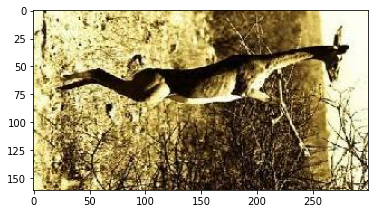

In [ ]:
## ATTENTION CERTAINES IMAGES SONT EN NOIR ET BLANC.
## On doit donc les mettre en shape (height, width) et non (height, width, channel)

random_image = np.random.randint(9000)
if all_image_tensors[random_image].shape[-1]==1:
  plt.imshow(all_image_tensors[random_image].numpy().squeeze())
else:
  plt.imshow(all_image_tensors[random_image])

* Nous allons maintenant insérer nos données dans un [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset). Insérez donc vos `paths` dans un `tf.data.Dataset`

In [ ]:
# Création d'un train set avec uniquement les images d'entrainement
tf_train_set = tf.data.Dataset.from_tensor_slices(all_image_paths)

* Créez une fonction `load_and_preprocess_images` qui s'occupera de faire le même preprocessing que plus haut.

In [ ]:
# Preprocess the images 
def load_and_preprocess_images(img):
  img = tf.io.read_file(img)
  img = tf.image. (img, channels=3)
  img = tf.image.resize(img, [224, 224])  
  return img/255.0

* Appliquez votre fonction sur votre dataset en utilisant [`.map()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map)

In [ ]:
tf_train_set = tf_train_set.map(load_and_preprocess_images)

* Créez une liste contenant tous les noms des dossiers (e.g  vos _targets_)

In [ ]:
# Get image labels 
labels = []
for label in train_folder.iterdir():
  labels += [label.name]
  
labels

['ewer',
 'flamingo',
 'cellphone',
 'pigeon',
 'Leopards',
 'Faces_easy',
 'emu',
 'windsor_chair',
 'dalmatian',
 'cup',
 'octopus',
 'metronome',
 'laptop',
 'stapler',
 'gerenuk',
 'ferry',
 'ant',
 'brontosaurus',
 'lamp',
 'dollar_bill',
 'bass',
 'helicopter',
 'saxophone',
 'crayfish',
 'airplanes',
 'BACKGROUND_Google',
 'mayfly',
 'ceiling_fan',
 'tick',
 'water_lilly',
 'electric_guitar',
 'soccer_ball',
 'Motorbikes',
 'bonsai',
 'nautilus',
 'watch',
 'euphonium',
 'panda',
 'revolver',
 'snoopy',
 'headphone',
 'minaret',
 'grand_piano',
 'beaver',
 'scissors',
 'dolphin',
 'elephant',
 'gramophone',
 'butterfly',
 'trilobite',
 'anchor',
 'cougar_body',
 'car_side',
 'pyramid',
 'menorah',
 'wrench',
 'ibis',
 'sea_horse',
 'garfield',
 'ketch',
 'joshua_tree',
 'Faces',
 'strawberry',
 'schooner',
 'platypus',
 'rooster',
 'crab',
 'hawksbill',
 'barrel',
 'umbrella',
 'wild_cat',
 'pizza',
 'lobster',
 'stop_sign',
 'mandolin',
 'scorpion',
 'accordion',
 'cougar_face'

* Créez maintenant un dictionnaire qui aura la structure suivante : 

{*label*: *index*} ---> ex : {*buddha*: 10}

In [ ]:
# Get index for both cats and dogs 
label_index = {}

for i, label in enumerate(labels):
  label_index[label]= i
  
label_index  

{'BACKGROUND_Google': 25,
 'Faces': 61,
 'Faces_easy': 5,
 'Leopards': 4,
 'Motorbikes': 32,
 'accordion': 76,
 'airplanes': 24,
 'anchor': 50,
 'ant': 16,
 'barrel': 68,
 'bass': 20,
 'beaver': 43,
 'binocular': 86,
 'bonsai': 33,
 'brain': 99,
 'brontosaurus': 17,
 'buddha': 98,
 'butterfly': 48,
 'camera': 84,
 'cannon': 101,
 'car_side': 52,
 'ceiling_fan': 27,
 'cellphone': 2,
 'chair': 93,
 'chandelier': 94,
 'cougar_body': 51,
 'cougar_face': 77,
 'crab': 66,
 'crayfish': 23,
 'crocodile': 79,
 'crocodile_head': 87,
 'cup': 9,
 'dalmatian': 8,
 'dollar_bill': 19,
 'dolphin': 45,
 'dragonfly': 92,
 'electric_guitar': 30,
 'elephant': 46,
 'emu': 6,
 'euphonium': 36,
 'ewer': 0,
 'ferry': 15,
 'flamingo': 1,
 'flamingo_head': 89,
 'garfield': 58,
 'gerenuk': 14,
 'gramophone': 47,
 'grand_piano': 42,
 'hawksbill': 67,
 'headphone': 40,
 'hedgehog': 81,
 'helicopter': 21,
 'ibis': 56,
 'inline_skate': 80,
 'joshua_tree': 60,
 'kangaroo': 88,
 'ketch': 59,
 'lamp': 18,
 'laptop': 12

* Créez maintenant une liste contenant tous les numéros de labels 

In [ ]:
# Create lables for each image
all_image_labels = [label_index[path.parent.name] for path in list(train_folder.glob("*/*"))]
all_image_labels[:5]

[0, 0, 0, 0, 0]

* Enfin insérez cette liste dans un `tf.data.Dataset`

In [ ]:
# Create a tf.data.Dataset of labels 
tf_labels = tf.data.Dataset.from_tensor_slices(all_image_labels)
for example in tf_labels.take(1):
  print(example)

tf.Tensor(0, shape=(), dtype=int32)


* Maintenant, créez un `full_ds` qui contiendra votre dataset de train et vos labels 

In [ ]:
# Create a full dataset 
full_ds = tf.data.Dataset.zip((tf_train_set, tf_labels))

for example in full_ds.take(1):
  print(example)

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.51439077, 0.46733192, 0.4830182 ],
        [0.5157282 , 0.46866933, 0.4843556 ],
        [0.5176471 , 0.47058824, 0.4862745 ],
        ...,
        [0.61960787, 0.49803922, 0.5176471 ],
        [0.61768895, 0.49612027, 0.5157282 ],
        [0.61635154, 0.4947829 , 0.51439077]],

       [[0.5176471 , 0.47058824, 0.4862745 ],
        [0.5176471 , 0.47058824, 0.4862745 ],
        [0.5176471 , 0.47058824, 0.4862745 ],
        ...,
        [0.61960787, 0.49803922, 0.5176471 ],
        [0.61960787, 0.49803922, 0.5176471 ],
        [0.61960787, 0.49803922, 0.5176471 ]],

       [[0.5176471 , 0.47058824, 0.4862745 ],
        [0.5176471 , 0.47058824, 0.4862745 ],
        [0.5177064 , 0.47064766, 0.48633394],
        ...,
        [0.61966723, 0.4980986 , 0.5177064 ],
        [0.61960787, 0.49803922, 0.5176471 ],
        [0.61960787, 0.49803922, 0.5176471 ]],

       ...,

       [[0.7607843 , 0.70980394, 0.74509805],
        [0.7

In [ ]:
full_ds = full_ds.shuffle(len(all_image_paths))

* Créez une fonction `data_aug` qui s'occupera de faire votre *Data Augmentation* 

In [ ]:
def data_aug(img, labels):
  img = tf.image.random_flip_left_right(img)
  img = tf.image.random_contrast(img, 0, 3.4)
  img = tf.image.random_crop(img, [224,224, 3])
  img = img
  return img, labels

* *texte en italique* Nous allons maintenant splitter notre `full_ds` en un `train_set` et un `test_set`. Vous choisirez un split 80/20. Pour vous aider, vous pouvez utiliser les méthodes : [`take`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) et [`skip`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#skip)

In [ ]:
train_size = int(0.8*len(all_image_paths)) # 80% de la longueur de toutes les images X le nombre de fois qu'on a répété le dataset / Batch Size

train_set = full_ds.take(train_size)
test_set = full_ds.skip(train_size)

* Créez un dataset d'entrainement répété 5 fois sur lequel vous allez appliquer votre fonction 

In [ ]:
repeated_train_set = train_set.repeat(5)

for example_x, example_y in repeated_train_set.take(1):
  print(example_x)

tf.Tensor(
[[[0.9043151  0.75137395 0.76313865]
  [0.9201645  0.76722336 0.77898806]
  [0.9268188  0.7738776  0.7856423 ]
  ...
  [0.42217767 0.6143345  0.35943258]
  [0.41110682 0.6032636  0.3463047 ]
  [0.437937   0.63339394 0.36467016]]

 [[0.8868849  0.73194796 0.73972106]
  [0.8891439  0.73515576 0.7429289 ]
  [0.8849527  0.73201156 0.7397847 ]
  ...
  [0.42027324 0.6124301  0.35752815]
  [0.41607115 0.608228   0.35126907]
  [0.4499301  0.64538705 0.37666327]]

 [[0.86351734 0.7066546  0.7105762 ]
  [0.867332   0.7107523  0.7146739 ]
  [0.87061656 0.7169848  0.7209064 ]
  ...
  [0.4129301  0.605087   0.35018498]
  [0.4043474  0.598249   0.3360557 ]
  [0.4310264  0.6270105  0.35670528]]

 ...

 [[0.2363183  0.475534   0.24363428]
  [0.27247027 0.51168597 0.2785686 ]
  [0.28950557 0.5287212  0.2973487 ]
  ...
  [0.39245403 0.61206186 0.35997853]
  [0.24928276 0.46889058 0.21890832]
  [0.22103804 0.44064587 0.19253276]]

 [[0.2396446  0.4846378  0.25133944]
  [0.2767122  0.51895845 0

In [ ]:
repeated_train_set = repeated_train_set.map(data_aug)

* Maintenant, appliquez un [`.shuffle()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle) puis un [`.batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) de 32 à votre dataset 

In [ ]:
# Shuffle the dataset & create batchs 
BATCH_SIZE=32

repeated_train_set = repeated_train_set.batch(BATCH_SIZE)
test_set = test_set.batch(BATCH_SIZE)

* Visualisez la première image des 10 premiers batchs. Affichez aussi son label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


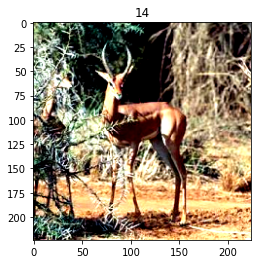

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


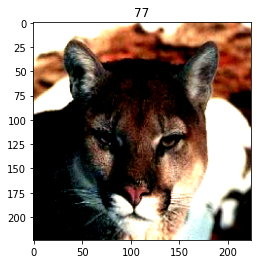

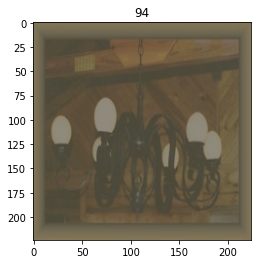

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


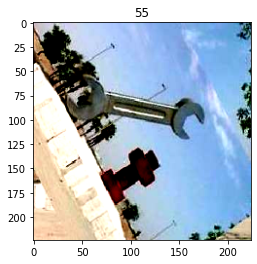

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


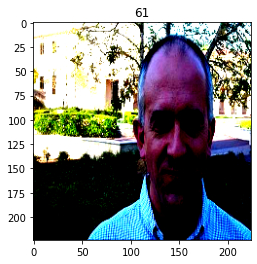

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


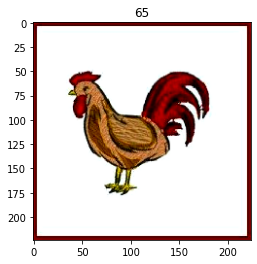

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


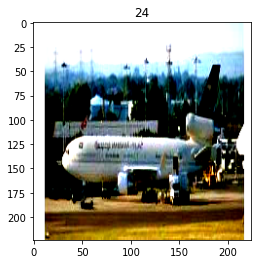

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


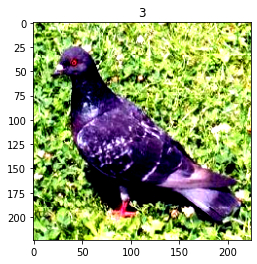

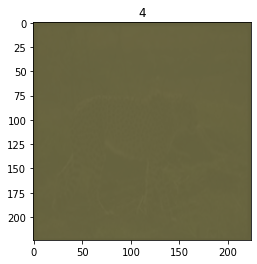

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


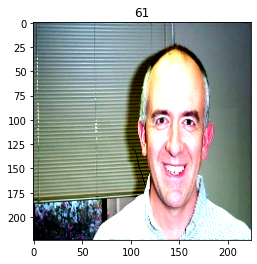

In [ ]:
# Visualize some data 
for example_x, example_y in repeated_train_set.take(10):
  plt.title(example_y[0].numpy())
  plt.imshow(example_x[0].numpy())
  plt.show()  

* Importez un modèle pré-entrainé dans Github en utilisant [`tf.keras.applications`](https://www.tensorflow.org/api_docs/python/tf/keras/applications). Nous vous conseillons d'utiliser `MobileNetV2`. 

NB : N'oubliez pas de donner la bonne `input_shape`, de ne pas prendre la dernière _layer_ et d'importer les poids de `imagenet`

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )

9412608/9406464 [==============================] - 0s 0us/step


* Paramétrez les poids de votre modèle importé comme non-entrainable 

In [ ]:
base_model.trainable = False

* Créez maintenant votre modèle complet en ajoutant la dernière couche adaptée à votre situation 

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(labels), activation="softmax")
])

* Créez un _learning rate schedule_ via [`tf.keras.optimizers.schedules`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules)

In [ ]:
# Créons un learning rate schedule pour décroitre le learning rate à mesure que nous entrainons le modèle 
initial_learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=6000,
    decay_rate=0.90,
    staircase=True)

* Créez un compileur via [`compile`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

* Fittez votre modèle et enregistrez chacune des épochs dans une variable `history`. Ajoutez aussi l'argument `validation_data` dans lequel vous y insérerez votre `test_set`

In [ ]:
history = model.fit(repeated_train_set,
                    validation_data=test_set,
                    epochs=15)

Epoch 1/15
1144/1144 [==============================] - 172s 150ms/step - loss: 1.9160 - sparse_categorical_accuracy: 0.6258 - val_loss: 0.6370 - val_sparse_categorical_accuracy: 0.9016
Epoch 2/15
 228/1144 [====>.........................] - ETA: 1:09 - loss: 0.7500 - sparse_categorical_accuracy: 0.8616

KeyboardInterrupt: ignored

* Visualisez votre `accuracy` votre `train` et sur votre `test 

In [ ]:
# Visualise train / Valid Accuracy
plt.plot(history.history["sparse_categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(history.history["val_sparse_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

* Faites de même pour votre `loss`

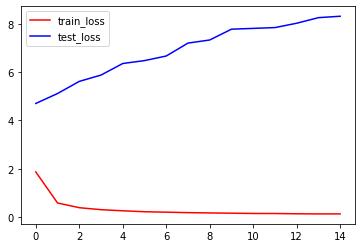

In [ ]:
# Visualise train / Valid Loss
plt.plot(history.history["loss"], c="r", label="train_loss")
plt.plot(history.history["val_loss"], c="b", label="test_loss")
plt.legend(loc="upper left")
plt.show()

* Comptez le nombre de _layers_ de votre modèle pré-entrainé

In [ ]:
len(base_model.layers)

155

* Débloquez une trentaine de couches à l'entrainement 

In [ ]:
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

* Recréez un compileur 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

* Entrainez à nouveau votre modèle pour effectuer votre _fine tuning_ 

In [ ]:
history = model.fit(repeated_train_set,
                    validation_data=test_set,
                    epochs=15)

Epoch 1/15


ValueError: ignored

* Visualisez votre `accuracy` sur votre `train` et sur votre `test`

In [ ]:
# Visualise train / Valid Accuracy
plt.plot(history.history["sparse_categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(history.history["val_sparse_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

* Faites de même pour votre `loss`

In [ ]:
# Visualise train / Valid Loss
plt.plot(history.history["loss"], c="r", label="train_loss")
plt.plot(history.history["val_loss"], c="b", label="test_loss")
plt.legend(loc="upper left")
plt.show()